## Embedding layer

Embedding layer는 입력으로 들어온 단어를 분산 표현으로 연결해 주는 역할을 한다.
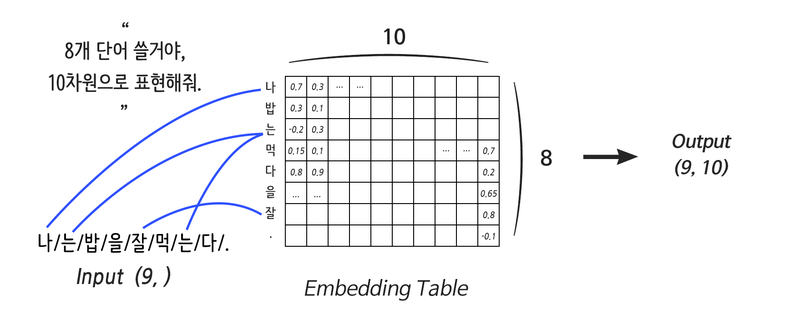

### - One-hot encoding

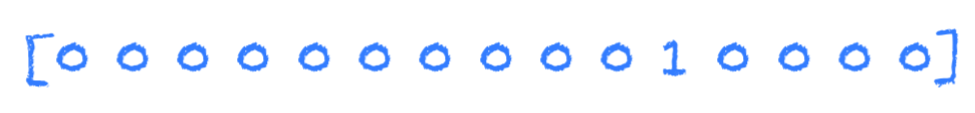

One-hot 벡터들은 딱 하나의 요소만 1이고 나머지는 모두 0인 희소벡터 형태를 띤다.   
이 경우 두 단어 벡터의 내적은 무조건 0으로 직교를 이룬다는 것을 알 수 있다.   
이는 단어 간 관계나 의미를 전혀 담지 못한 채 서로 독립적이라는 의미이다.

### - Word embedding

One hot encoding 과는 다르게 하나의 단어가 미리 정의된 차원에서 연속형의 값을 갖는 벡터로 표현된다.   
게다가 각각의 차원은 모두 정보를 들고 있다. 벡터 연산을 통해 단어 벡터 간 유사도를 구할 수 있다.

In [1]:
import tensorflow as tf

vocab = {      # 사용할 단어 사전 정의
    "i": 0,
    "need": 1,
    "some": 2,
    "more": 3,
    "coffee": 4,
    "cake": 5,
    "cat": 6,
    "dog": 7
}

sentence = "i i i i need some more coffee coffee coffee"
# 위 sentence
_input = [vocab[w] for w in sentence.split()]  # [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]

vocab_size = len(vocab)   # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy())    # 원-핫 인코딩 벡터를 출력해 봅시다.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [2]:
distribution_size = 2   # 보기 좋게 2차원으로 분산 표현하도록 하죠!
linear = tf.keras.layers.Dense(units=distribution_size, use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[ 0.01185727  0.17582828]
 [-0.47120246 -0.56241226]
 [ 0.46537519 -0.02954984]
 [-0.60441124  0.25252497]
 [-0.00256866 -0.73142594]
 [ 0.7460455   0.29468906]
 [-0.39740062 -0.426061  ]
 [-0.3813925   0.64439774]]

One-Hot Linear Result
[[ 0.01185727  0.17582828]
 [ 0.01185727  0.17582828]
 [ 0.01185727  0.17582828]
 [ 0.01185727  0.17582828]
 [-0.47120246 -0.56241226]
 [ 0.46537519 -0.02954984]
 [-0.60441124  0.25252497]
 [-0.00256866 -0.73142594]
 [-0.00256866 -0.73142594]
 [-0.00256866 -0.73142594]]


- One-hot 벡터에 linear 레이어를 적용하니 linear 레이어의 Weight에서 단어 인덱스 배열 (0,0,0,0,1,2,3,4,4,4) 에 해당하는 행만 읽어오는 효과가 있다.   

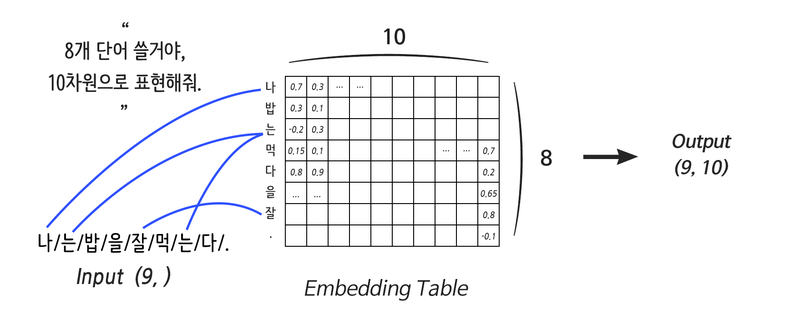
- 각 단어를 One-hot 인코딩해서 linear 연산을 하는 것이 위의 파란 선의 정체인 것이다.

In [3]:
# Tensorflow에서 Embedding 레이어 선언

some_words = tf.constant([[3, 57, 35]])
# 3번 단어 / 57번 단어 / 35번 단어로 이루어진 한 문장입니다.

print("Embedding을 진행할 문장:", some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
# 총 64개의 단어를 포함한 Embedding 레이어를 선언할 것이고,
# 각 단어는 100차원으로 분산표현 할 것입니다.

print("Embedding된 문장:", embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


# RNN

나는 밥을 ( )는다. 라는 예문을 보면 빈칸에 들어갈 말이 '먹' 이라는 것을 알 것이다. 그 건거는 '먹'이 등장하기 전 '밥' 이라는 단어 때문일 것이다.   
문장, 영상, 음성 등의 데이터는 한 장의 이미지와는 다르게 순차적인 특성을 가지고 있다.

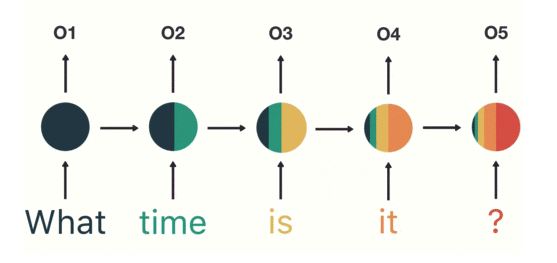

하지만 그림에서 볼 수 있듯 시간의 흐름에 따라 '?'에 다다라서는 'What'에 대한 정보가 거의 희석된 모습을 보이고 있다. 이것이 RNN의 고질적인 문제점인데, 이를 기울기 소실 문제라고 한다.

In [4]:
sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print("Embedding을 위해 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN 결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN 결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)

RNN에 입력할 문장: What time is it ?
Embedding을 위해 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)

Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN 결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN 결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


# LSTM

LSTM은 기울기 소실 문제를 해결하기 위해 고안된 RNN 레이어이다.   
LSTM은 바닐라 RNN보다 4배나 큰 Weight를 가지고 있다.   
LSTM에는 Cell state 라는 새로운 개념이 추가되는데, 긴 문장이 들어와도 이 Cell state를 통해 오래된 기억 또한 큰 손실 없이 저장해준다.
- LSTM의 3개의 Gate layer
    - Forget Gate Layer : cell state의 기존 정보를 얼마나 잊어버릴지 결정하는 gate
    - Input Gate Layer : 새롭게 만들어진 cell state를 기존 cell state에 얼마나 반영할지를 결정하는 gate
    - Output Gate Layer : 새롭게 만들어진 cell state를 새로운 hidden state에 얼마나 반영할지를 결정하는 gate

# GRU

GRU는 LSTM에 비해 학습할 가중치가 더 적다. (LSTM의 1/4)   
LSTM의 Forget Gate와 Input Gate를 Update Gate로 합치고, Cell state와 Hidden state를 합쳤다.   
- 둘 다 각각의 장단점이 있어서 뭐가 더 좋다고 단정 지을 수는 없다. LSTM은 Weight가 많기 때문에 충분한 데이터가 있는 상황에 적합하고, 반대로 GRU는 적은 데이터에도 웬만한 학습 성능을 보여준다.

# Bidirectional RNN

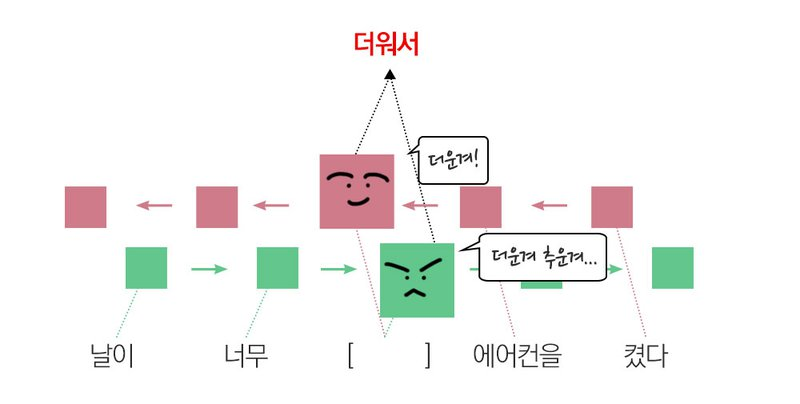

In [5]:
import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("입력 문장 데이터 형태:", emb_out.shape)

bi_rnn = \
tf.keras.layers.Bidirectional(
    tf.keras.layers.SimpleRNN(units=64, use_bias=False, return_sequences=True)
)
bi_out = bi_rnn(emb_out)

print("Bidirectional RNN 결과 (최종 Step Output):", bi_out.shape)

입력 문장 데이터 형태: (1, 5, 100)
Bidirectional RNN 결과 (최종 Step Output): (1, 5, 128)


- Bidirectional RNN은 순방향 Weight와 역방향 Weight를 각각 정의하므로 우리가 앞에서 배운 RNN의 2배 크기 Weight가 정의된다.